# Assignment Overview


## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination.

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD

### Dataframes details

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.

In [ ]:
file_path = r'C:\Users\guira\Downloads\Assignment_data\Assignment_data\ABC_df_customer.csv'
df_customer = pd.read_csv(file_path)

df_customer.head()

C:\Users\guira\AppData\Local\Temp\ipykernel_8380\253740315.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer = pd.read_csv(file_path)


,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411
1,1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414
2,2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442
3,3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463
4,4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366


In [ ]:
print(df_customer.columns[6])

CUST_START_DATE


In [ ]:
file_path = r'C:\Users\guira\Downloads\Assignment_data\Assignment_data\ABC_df_demographic.csv'
df_demographics = pd.read_csv(file_path)

df_demographics.head()

,Unnamed: 0,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,0,2.213028e+11,187500.000,1.0,8.0,Single,300000 - 349999,1,1,1,Y
1,1,2.213032e+11,63750.000,0.0,0.0,Single,NaN,0,0,0,N
2,2,2.213032e+11,41250.000,0.0,15.0,Married,75000 - 99999,1,0,1,N
3,3,2.213032e+11,120558.264,0.0,0.0,NaN,1000 - 24999,1,0,0,N
4,4,2.213032e+11,187500.000,0.0,0.0,NaN,NaN,0,0,1,Y


In [ ]:
file_path = r'C:\Users\guira\Downloads\Assignment_data\Assignment_data\ABC_df_termination.csv'
df_termination = pd.read_csv(file_path)

df_termination.head()

,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
0,0,2.213026e+11,2022-10-09
1,1,2.213028e+11,2022-04-24
2,2,2.213027e+11,2022-05-21
3,3,2.213002e+11,2022-04-27
4,4,2.213026e+11,2022-09-16


In [ ]:
df_customer.dtypes

Unnamed: 0                  int64
INDIVIDUAL_ID             float64
ADDRESS_ID                float64
CUST_ORIG_DATE             object
DATE_OF_BIRTH              object
SOCIAL_SECURITY_NUMBER     object
CUST_START_DATE            object
CURR_ANN_AMT_CAR          float64
CURR_ANN_AMT_HEALTH       float64
CURR_ANN_AMT_HOUSE          int64
dtype: object

In [ ]:
df_demographics.dtypes

Unnamed: 0               int64
INDIVIDUAL_ID          float64
INCOME                 float64
HAS_CHILDREN           float64
LENGTH_OF_RESIDENCE    float64
MARITAL_STATUS          object
HOME_MARKET_VALUE       object
HOME_OWNER               int64
COLLEGE_DEGREE           int64
GOOD_CREDIT              int64
ADVANCED_STUDIES        object
dtype: object

In [ ]:
df_termination.dtypes

Unnamed: 0         int64
INDIVIDUAL_ID    float64
SUSPD_DATE        object
dtype: object

In [ ]:
df_customer.rename(columns={'Unnamed: 0': 'RECORD_ID'}, inplace=True)
df_demographics.rename(columns={'Unnamed: 0': 'RECORD_ID'}, inplace=True)
df_termination.rename(columns={'Unnamed: 0': 'RECORD_ID'}, inplace=True)

In [ ]:
df_customer['CUST_START_DATE'] = pd.to_datetime(df_customer['CUST_START_DATE'], errors='coerce')

In [ ]:
df_c = df_customer.drop_duplicates()
df_d = df_demographics.drop_duplicates()
df_t = df_termination.drop_duplicates()

In [ ]:
df_c.count()

RECORD_ID                 2303124
INDIVIDUAL_ID             2303123
ADDRESS_ID                2303123
CUST_ORIG_DATE            2303124
DATE_OF_BIRTH             2303124
SOCIAL_SECURITY_NUMBER    2303124
CUST_START_DATE           2211911
CURR_ANN_AMT_CAR          2303124
CURR_ANN_AMT_HEALTH       2303124
CURR_ANN_AMT_HOUSE        2303124
dtype: int64

In [ ]:
df_d.count()

RECORD_ID              2112579
INDIVIDUAL_ID          2112579
INCOME                 2112579
HAS_CHILDREN           2112579
LENGTH_OF_RESIDENCE    2112579
MARITAL_STATUS         1680931
HOME_MARKET_VALUE      1922374
HOME_OWNER             2112579
COLLEGE_DEGREE         2112579
GOOD_CREDIT            2112579
ADVANCED_STUDIES       2112579
dtype: int64

In [ ]:
df_t.count()

RECORD_ID        269259
INDIVIDUAL_ID    269259
SUSPD_DATE       266566
dtype: int64

In [ ]:
print(df_c.isnull().sum())

RECORD_ID                     0
INDIVIDUAL_ID                 1
ADDRESS_ID                    1
CUST_ORIG_DATE                0
DATE_OF_BIRTH                 0
SOCIAL_SECURITY_NUMBER        0
CUST_START_DATE           91213
CURR_ANN_AMT_CAR              0
CURR_ANN_AMT_HEALTH           0
CURR_ANN_AMT_HOUSE            0
dtype: int64


In [ ]:
print(df_d.isnull().sum())

RECORD_ID                   0
INDIVIDUAL_ID               0
INCOME                      0
HAS_CHILDREN                0
LENGTH_OF_RESIDENCE         0
MARITAL_STATUS         431648
HOME_MARKET_VALUE      190205
HOME_OWNER                  0
COLLEGE_DEGREE              0
GOOD_CREDIT                 0
ADVANCED_STUDIES            0
dtype: int64


In [ ]:
print(df_t.isnull().sum())

RECORD_ID           0
INDIVIDUAL_ID       0
SUSPD_DATE       2693
dtype: int64


In [ ]:
df_c = df_c.dropna()
df_c.count()

RECORD_ID                 2211910
INDIVIDUAL_ID             2211910
ADDRESS_ID                2211910
CUST_ORIG_DATE            2211910
DATE_OF_BIRTH             2211910
SOCIAL_SECURITY_NUMBER    2211910
CUST_START_DATE           2211910
CURR_ANN_AMT_CAR          2211910
CURR_ANN_AMT_HEALTH       2211910
CURR_ANN_AMT_HOUSE        2211910
dtype: int64

In [ ]:
df_d = df_d.dropna()
df_d.count()

RECORD_ID              1588644
INDIVIDUAL_ID          1588644
INCOME                 1588644
HAS_CHILDREN           1588644
LENGTH_OF_RESIDENCE    1588644
MARITAL_STATUS         1588644
HOME_MARKET_VALUE      1588644
HOME_OWNER             1588644
COLLEGE_DEGREE         1588644
GOOD_CREDIT            1588644
ADVANCED_STUDIES       1588644
dtype: int64

In [ ]:
df_t = df_t.dropna()
df_t.count()

RECORD_ID        266566
INDIVIDUAL_ID    266566
SUSPD_DATE       266566
dtype: int64

In [ ]:
df_c['CUST_ORIG_DATE'] = pd.to_datetime(df_c['CUST_ORIG_DATE'], errors='coerce')
df_c['DATE_OF_BIRTH'] = pd.to_datetime(df_c['DATE_OF_BIRTH'], errors='coerce')

df_c_clean= df_c
df_d_clean= df_d
df_t_clean= df_t

<Axes: xlabel='CURR_ANN_AMT_CAR'>

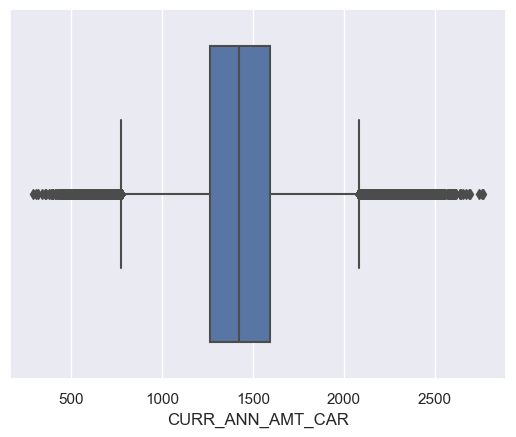

In [ ]:
sns.boxplot(x=df_c_clean['CURR_ANN_AMT_CAR'])

<Axes: xlabel='CURR_ANN_AMT_HEALTH'>

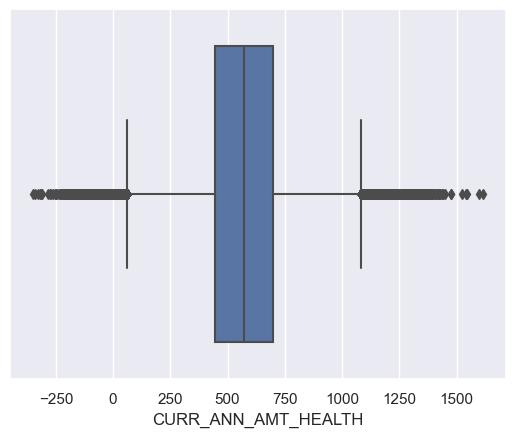

In [ ]:
sns.boxplot(x=df_c_clean['CURR_ANN_AMT_HEALTH'])

<Axes: xlabel='CURR_ANN_AMT_HOUSE'>

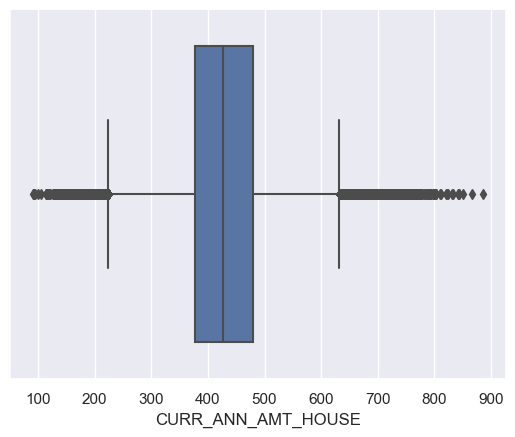

In [ ]:
sns.boxplot(x=df_c_clean['CURR_ANN_AMT_HOUSE'])

In [ ]:
Q1 = df_c_clean.quantile(0.25, numeric_only=True)
Q3 = df_c_clean.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

RECORD_ID              1.140072e+06
INDIVIDUAL_ID          1.803147e+06
ADDRESS_ID             6.486918e+05
CURR_ANN_AMT_CAR       3.270118e+02
CURR_ANN_AMT_HEALTH    2.559034e+02
CURR_ANN_AMT_HOUSE     1.020000e+02
dtype: float64


In [ ]:
Q1 = df_t_clean.quantile(0.25, numeric_only=True)
Q2 = df_t_clean.quantile(0.75, numeric_only=True)
IQT = Q2 - Q1
print(IQT)

RECORD_ID         134615.5
INDIVIDUAL_ID    1793005.0
dtype: float64


In [ ]:
Q1 = df_d_clean.quantile(0.25, numeric_only=True)
Q3 = df_d_clean.quantile(0.75, numeric_only=True)
IQD = Q3 - Q1
print(IQD)

RECORD_ID              1056063.50
INDIVIDUAL_ID          1810601.25
INCOME                   60000.00
HAS_CHILDREN                 1.00
LENGTH_OF_RESIDENCE         10.00
HOME_OWNER                   0.00
COLLEGE_DEGREE               1.00
GOOD_CREDIT                  0.00
dtype: float64


In [ ]:
df_d_clean = df_d_clean[~((df_d_clean < (Q1 - 1.5 * IQR)) |(df_d_clean > (Q2 + 1.5 * IQR))).any(axis=1)]
df_d_clean.shape

C:\Users\guira\AppData\Local\Temp\ipykernel_8380\384545567.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_d_clean = df_d_clean[~((df_d_clean < (Q1 - 1.5 * IQR)) |(df_d_clean > (Q2 + 1.5 * IQR))).any(axis=1)]


(1437857, 11)

In [ ]:
df_t_clean = df_t_clean[~((df_t_clean < (Q1 - 1.5 * IQR)) |(df_t_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
df_t_clean.shape

C:\Users\guira\AppData\Local\Temp\ipykernel_8380\475624488.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_t_clean = df_t_clean[~((df_t_clean < (Q1 - 1.5 * IQR)) |(df_t_clean > (Q3 + 1.5 * IQR))).any(axis=1)]


(266566, 3)

C:\Users\guira\AppData\Local\Temp\ipykernel_8380\1529282618.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df_c_clean.corr()


,RECORD_ID,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
RECORD_ID,1.000000,0.000232,0.000257,0.001913,0.000273,0.001809
INDIVIDUAL_ID,0.000232,1.000000,0.986945,-0.010816,-0.005561,-0.010218
ADDRESS_ID,0.000257,0.986945,1.000000,-0.012318,-0.006376,-0.011641
CURR_ANN_AMT_CAR,0.001913,-0.010816,-0.012318,1.000000,0.514943,0.962188
CURR_ANN_AMT_HEALTH,0.000273,-0.005561,-0.006376,0.514943,1.000000,0.495110
CURR_ANN_AMT_HOUSE,0.001809,-0.010218,-0.011641,0.962188,0.495110,1.000000


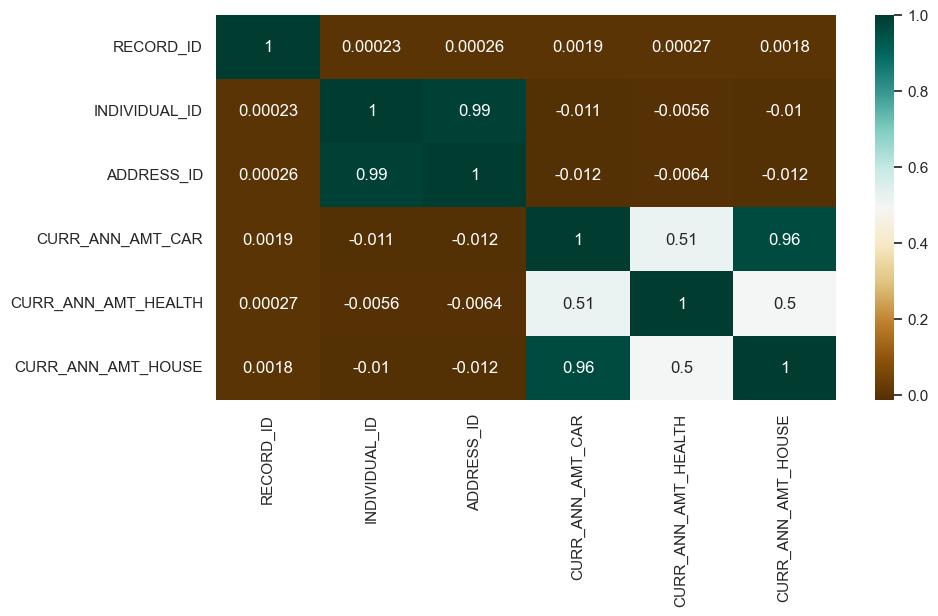

In [ ]:
plt.figure(figsize=(10,5))
c= df_c_clean.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

C:\Users\guira\AppData\Local\Temp\ipykernel_8380\1863811419.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d= df_d_clean.corr()


,RECORD_ID,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
RECORD_ID,1.000000,-0.007824,0.001372,-0.000543,0.001267,-0.001789,-0.000634,0.001480
INDIVIDUAL_ID,-0.007824,1.000000,-0.045325,-0.042159,-0.027746,0.030130,0.023433,-0.075025
INCOME,0.001372,-0.045325,1.000000,0.044030,0.049750,0.184063,0.123847,0.267097
HAS_CHILDREN,-0.000543,-0.042159,0.044030,1.000000,-0.098198,0.061007,0.039305,0.008840
LENGTH_OF_RESIDENCE,0.001267,-0.027746,0.049750,-0.098198,1.000000,0.242752,0.030170,0.038500
HOME_OWNER,-0.001789,0.030130,0.184063,0.061007,0.242752,1.000000,0.101975,0.121677
COLLEGE_DEGREE,-0.000634,0.023433,0.123847,0.039305,0.030170,0.101975,1.000000,0.038015
GOOD_CREDIT,0.001480,-0.075025,0.267097,0.008840,0.038500,0.121677,0.038015,1.000000


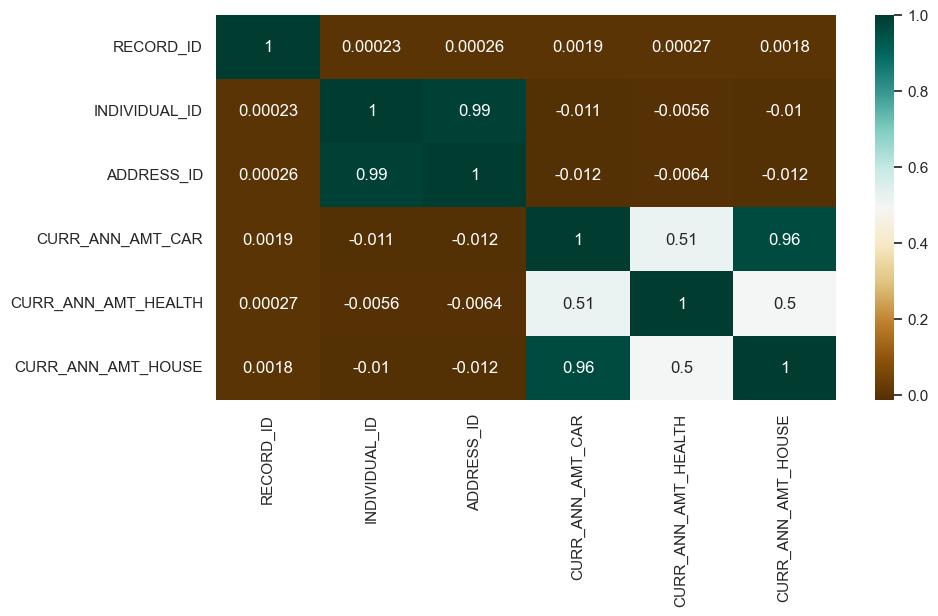

In [ ]:
plt.figure(figsize=(10,5))
d= df_d_clean.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
d

C:\Users\guira\AppData\Local\Temp\ipykernel_8380\2960520361.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  t= df_t_clean.corr()


,RECORD_ID,INDIVIDUAL_ID
RECORD_ID,1.000000,0.003317
INDIVIDUAL_ID,0.003317,1.000000


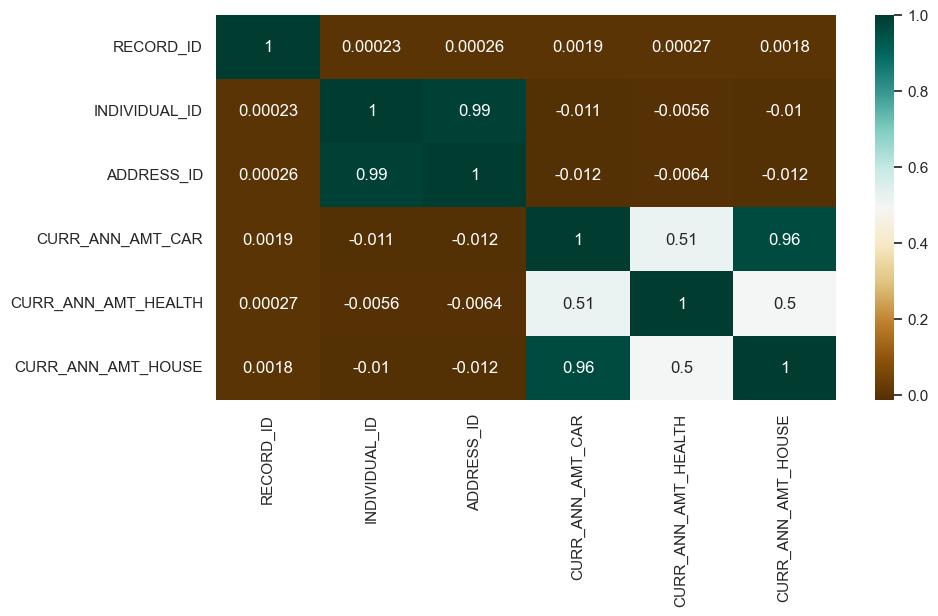

In [ ]:
plt.figure(figsize=(10,5))
t= df_t_clean.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
t

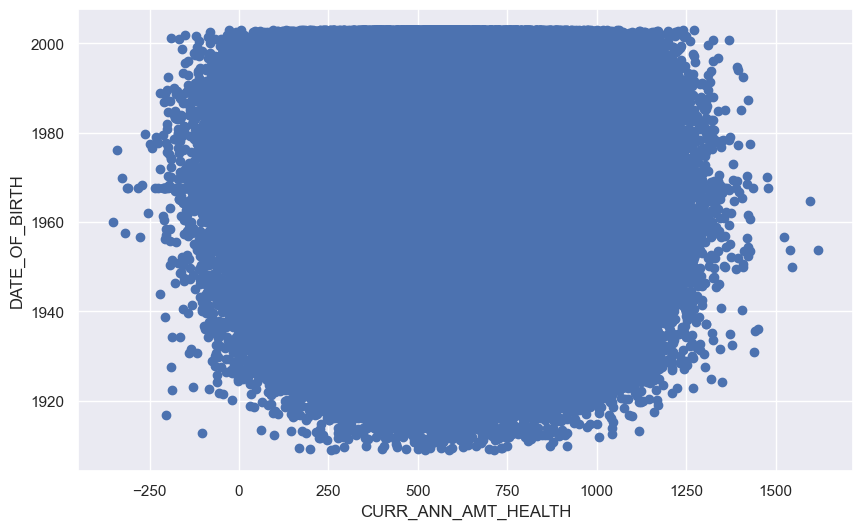

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_c_clean['CURR_ANN_AMT_HEALTH'], df_c_clean['DATE_OF_BIRTH'])
ax.set_xlabel('CURR_ANN_AMT_HEALTH')
ax.set_ylabel('DATE_OF_BIRTH')
plt.show()

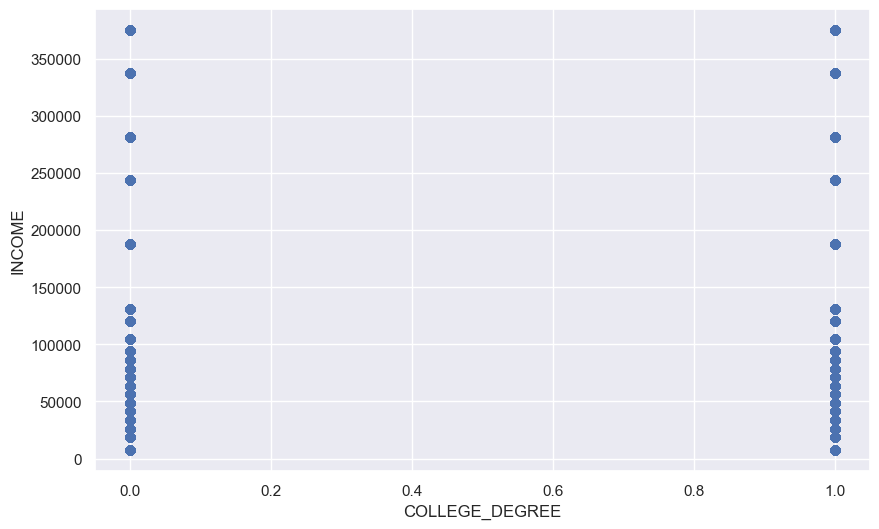

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_d_clean['COLLEGE_DEGREE'], df_d_clean['INCOME'])
ax.set_xlabel('COLLEGE_DEGREE')
ax.set_ylabel('INCOME')
plt.show()

In [ ]:
# Merge the first two DataFrames on 'INDIVIDUAL_ID'
customer_demographic_df = pd.merge(df_c_clean, df_d_clean, on='INDIVIDUAL_ID', how='inner')

# Merge the result with the third DataFrame on 'INDIVIDUAL_ID'
merged_df = pd.merge(customer_demographic_df, df_t_clean, on='INDIVIDUAL_ID', how='inner')

# Drop rows with any null values
cleaned_df = merged_df.dropna()
cleaned_customer_demographic_df = customer_demographic_df.dropna()

# Drop duplicates
no_duplicates_df = cleaned_df.drop_duplicates()
no_duplicates_customer_demographic_df = cleaned_customer_demographic_df.drop_duplicates()

# Randomly select 40% of the data
cd_df = no_duplicates_customer_demographic_df.sample(frac=0.3)
all_df = no_duplicates_df.sample(frac=0.6)
df_t_clean

,RECORD_ID,INDIVIDUAL_ID,SUSPD_DATE
0,0,2.213026e+11,2022-10-09
1,1,2.213028e+11,2022-04-24
2,2,2.213027e+11,2022-05-21
3,3,2.213002e+11,2022-04-27
4,4,2.213026e+11,2022-09-16
...,...,...,...
269254,269254,2.213022e+11,2022-01-09
269255,269255,2.213007e+11,2022-02-27
269256,269256,2.213030e+11,2022-03-21
269257,269257,2.213025e+11,2022-02-26


In [ ]:
cd_df['CURR_ANN_AMT_TOTAL'] = cd_df['CURR_ANN_AMT_CAR'] + cd_df['CURR_ANN_AMT_HEALTH'] + cd_df['CURR_ANN_AMT_HOUSE']
cd_df = cd_df.drop(['SOCIAL_SECURITY_NUMBER', 'LENGTH_OF_RESIDENCE', 'HOME_MARKET_VALUE'], axis=1)

In [ ]:
all_df = all_df.sort_values(by='RECORD_ID_x')
all_df = all_df.drop(columns=['RECORD_ID_x', 'RECORD_ID', 'RECORD_ID_y'])
all_df = all_df.drop(['SOCIAL_SECURITY_NUMBER', 'LENGTH_OF_RESIDENCE', 'HOME_MARKET_VALUE'], axis=1)
all_df['CURR_ANN_AMT_TOTAL'] = all_df['CURR_ANN_AMT_CAR'] + all_df['CURR_ANN_AMT_HEALTH'] + all_df['CURR_ANN_AMT_HOUSE']
all_df['SUSPD_DATE'] = pd.to_datetime(all_df['SUSPD_DATE'])
all_df['CUST_START_DATE'] = pd.to_datetime(all_df['CUST_START_DATE'])
all_df['DAYS_TO_SUSPENSION'] = (all_df['SUSPD_DATE'] - all_df['CUST_START_DATE']).dt.days
all_df

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,MARITAL_STATUS,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE,CURR_ANN_AMT_TOTAL,DAYS_TO_SUSPENSION
0,2.213029e+11,5.213011e+11,2017-02-24,1966-07-27,2017-02-24,1417.201036,721.613015,425,71250.0,0.0,Single,1,1,1,N,2022-12-01,2563.814051,2106
1,2.213013e+11,5.213005e+11,2022-03-20,1969-11-25,2022-03-20,1250.160284,623.893692,394,33750.0,1.0,Single,0,0,0,N,2022-03-12,2268.053976,-8
2,2.213014e+11,5.213005e+11,2010-12-01,1945-01-01,2010-12-01,1515.138116,517.785944,495,375000.0,1.0,Married,1,0,1,N,2022-06-12,2527.924060,4211
3,2.213022e+11,5.213008e+11,2022-06-24,1967-07-07,2022-06-24,1556.097264,835.069481,482,131250.0,1.0,Married,1,0,1,N,2022-01-28,2873.166745,-147
6,2.213020e+11,5.213007e+11,2020-04-01,1987-03-22,2020-04-01,1110.580759,587.199636,344,105000.0,1.0,Married,1,0,1,N,2022-04-25,2041.780395,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157684,2.213003e+11,5.213001e+11,2022-08-23,1977-06-23,2010-08-26,1491.403986,502.284170,478,93750.0,1.0,Married,1,0,1,N,2022-09-19,2471.688156,4407
157685,2.213002e+11,5.213001e+11,2005-09-11,1926-10-06,2005-09-11,1572.486058,607.510106,494,56250.0,0.0,Single,1,1,1,N,2022-07-02,2673.996164,6138
157687,2.213017e+11,5.213006e+11,2022-07-21,1968-05-26,2022-07-21,1034.554513,859.032442,297,187500.0,1.0,Married,1,0,1,N,2022-03-09,2190.586955,-134
157688,2.213033e+11,5.213015e+11,2022-07-05,1964-01-26,2022-07-05,1113.997818,355.762198,343,26250.0,0.0,Single,0,0,0,N,2022-06-23,1812.760016,-12


In [ ]:
cd_df = cd_df.drop(columns=['RECORD_ID_y'])

In [ ]:
cd_df

,RECORD_ID_x,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,MARITAL_STATUS,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,CURR_ANN_AMT_TOTAL
246683,403860,2.213023e+11,5.213008e+11,2005-09-11,1944-10-02,2005-09-11,1512.231467,320.121160,445,375000.0,0.0,Married,1,0,1,N,2277.352627
115714,189644,2.213007e+11,5.213003e+11,2005-09-11,1970-12-26,1991-09-15,1242.442031,242.768437,371,105000.0,0.0,Single,0,1,1,N,1856.210468
478636,784347,2.213014e+11,5.213005e+11,2022-09-13,1967-07-07,2022-09-13,1913.012159,704.744001,604,187500.0,1.0,Married,1,0,1,Y,3221.756160
944717,1544866,2.213015e+11,5.213005e+11,2020-01-01,1985-07-22,2020-01-01,1507.906972,701.687264,463,26250.0,0.0,Single,1,0,1,N,2672.594236
42146,70059,2.213031e+11,5.213013e+11,2019-04-02,1980-07-24,2019-04-02,1340.244871,350.579471,380,86250.0,1.0,Married,1,0,1,N,2070.824342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273356,446805,2.213030e+11,5.213012e+11,2005-09-11,1952-04-30,2005-09-11,1383.471037,736.970648,438,7500.0,0.0,Single,0,0,0,N,2558.441685
465918,763374,2.213004e+11,5.213002e+11,2019-08-03,1967-12-28,2019-08-03,1523.837387,714.153471,465,86250.0,1.0,Married,1,1,1,N,2702.990858
978173,1599112,2.213010e+11,5.213004e+11,2016-10-11,1974-04-24,2016-10-11,1625.072016,649.709595,477,131250.0,1.0,Married,1,0,1,N,2751.781611
430531,704698,2.213031e+11,5.213014e+11,2011-06-09,1976-04-24,2011-06-09,1600.272380,723.767921,476,86250.0,1.0,Married,1,1,1,N,2800.040301


During my initial exploratory data analysis, I focused on fully understanding the project by loading and examining the three datasets: customer, demographics, and termination, within a Jupyter Notebook environment. I came across a column ambiguously titled "Unnamed:0," which was effectively functioning as a unique identifier for each entry. To eliminate any potential confusion during the analysis phase, I renamed this column to "ID_RECORD," emphasizing the importance of clearly labelled identifier columns for preserving data accuracy and integrity.

I also noticed formatting discrepancies and the presence of null entries in the "CUST_START_DATE" column, which could adversely affect any analysis that relies on temporal data, such as tracking customer trends over time. To rectify this, I intended to standardize this column to a uniform datetime format, making it suitable for precise and insightful time-based analysis.
Despite these findings, I refrained from discarding any columns, believing that each could offer valuable insights for constructing a predictive model, especially within the context of an insurance company's customer data. This decision highlights the critical nature of thoughtful feature selection in model development to ensure the resulting model is both precise and pertinent.

I opted not to rename any columns other than "ID_RECORD," as their titles were sufficiently clear and informative, aiding in an effortless comprehension of the dataset's content.

Additionally, I converted other date columns, "CUST_ORIG_DATE" and "DATE_OF_BIRTH," from string format to datetime. This conversion is essential for analyses that involve age, tenure, or any other time-dependent calculations, ensuring the data accurately represents temporal aspects.
In my pursuit of data cleaning, I rigorously identified and eliminated any null or duplicate entries across the datasets, a step imperative for upholding analytical integrity. Such anomalies can introduce bias or errors, skewing the results.

I also verified that the record counts were uniform across all columns within each dataset, ensuring no data was missing or superfluous. This uniformity is crucial for the analysis's reliability, as discrepancies in record counts can signal issues like incomplete data collection or data loss.

The datasets appeared content-wise accurate and without any logical inconsistencies or anomalies that could compromise the analysis.
By carefully addressing these issues, I have primed the datasets for detailed analysis.

The data quality noticeably improved post-cleanup, a fact that can be substantiated through various metrics and observations. To deepen my understanding of the data, I tried to identify and eliminate potential outliers within the customer data frame, particularly in the columns detailing annual payments for car, health, and house insurance. The extent of these outliers is evident in the boxplot and through certain code snippets, leading to the removal of some. Furthermore, I generated scatterplots to elucidate correlations between variables like health insurance payments and date of birth or college degree and income.

I also created heatmaps and confusion matrix to discern which variables held the most significance in each dataset, enhancing my comprehension of the data. Lastly, to simplify the task, I merged the three data frames together by the common column between the three: INDIVIDUAL_ID and I got a final dataset where I will use 20% of it to build the models to better process it. I took this decision because the models would be way more complex to implement if I used all the rows of the entire data frame. Also decided to remove Length of Residence, Home Market Value and Social Security Number because I don't believe they are useful features to train the model. Computed the total customer value by suming the three values available as I believe it will be useful to build the first two models. The final results is a dataframe with the customer and demographic information, a dataframe with the informations of the termination and a dataframe with all the contents to use in the models.

Finally, I'll use 30% of the customer and demographic informations dataframe and 60% of the dataset with all the informations to build the models. I did that in order to reduce run times. All the pieces of code above represent with clarity what I did for each segment of the Exploratory Data Analysis. It covers completely the main topics of completeness, accuracy, consistency, validity, timeliness and relevance.


#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


The data cleaning and preparation process undertaken highlights several critical insights with direct implications for the business, particularly in the insurance domain. The identification and rectification of ambiguities, such as the renaming of the "Unnamed:0" column to "ID_RECORD," and the standardization of date formats in columns like "CUST_START_DATE," "CUST_ORIG_DATE," and "DATE_OF_BIRTH," significantly enhance the data's reliability. This foundational clarity is essential for any temporal analysis, such as tracking customer trends over time, which is vital for understanding customer behaviour, policy renewals, and potentially forecasting future customer engagement. The rigorous elimination of null and duplicate entries further improves the dataset, ensuring that the analysis is based on accurate and complete information, thereby reducing the risk of bias or errors that could skew insights and decision-making.

The strategic decision not to discard any columns, based on the belief that each could offer valuable insights for constructing a predictive model, underscores a thoughtful approach to feature selection. This is particularly relevant in the insurance sector, where diverse variables can influence risk assessment and policy pricing. The conversion of vital date columns from string to datetime format aids in analyses involving age and tenure, which are critical for assessing risk profiles and customizing insurance offerings. Moreover, the identification and elimination of outliers in annual payments for car, health, and house insurance highlight the importance of understanding payment patterns, which could indicate potential fraud or errors in billing. The generation of scatterplots and heatmaps to elucidate correlations and the significance of variables, and the merging of datasets using the "INDIVIDUAL_ID" column, streamline the analysis, making it easier to derive actionable insights. These steps not only enhance the data quality but also provide a robust foundation for developing predictive models that can significantly impact business strategies, such as targeted marketing, personalized insurance packages, and risk management.


## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics. (15 points)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define features and target
numeric_features = ["INCOME"]
categorical_features = ["HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"]
features = numeric_features + categorical_features
target = 'CURR_ANN_AMT_TOTAL'

# Split the data
train_data, test_data = train_test_split(cd_df, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create a pipeline with Linear Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# There's no need for a param_grid for LinearRegression as it doesn't have hyperparameters like Ridge

# Fit the pipeline on the training data
pipeline_lr.fit(train_data[features], train_data[target])

# Predict on the testing data
y_test_pred_lr = pipeline_lr.predict(test_data[features])

# Calculate and print MSE for Linear Regression
test_mse_lr = mean_squared_error(test_data[target], y_test_pred_lr)
print(f"Testing error with Linear Regression (MSE): {test_mse_lr}")

# Predict on the training data
y_train_pred_lr = pipeline_lr.predict(train_data[features])

# Calculate and print MSE for training data
train_mse_lr = mean_squared_error(train_data[target], y_train_pred_lr)
print(f"Training error with Linear Regression (MSE): {train_mse_lr}")

# Calculate and print MAE for testing data
test_mae_lr = mean_absolute_error(test_data[target], y_test_pred_lr)
print(f"Testing error with Linear Regression (MAE): {test_mae_lr}")

# Calculate and print R-squared for testing data
test_r2_lr = r2_score(test_data[target], y_test_pred_lr)
print(f"Testing R^2 with Linear Regression: {test_r2_lr}")

Testing error with Linear Regression (MSE): 198275.56641847442
Training error with Linear Regression (MSE): 197200.70534008343
Testing error with Linear Regression (MAE): 354.3391775486414
Testing R^2 with Linear Regression: 0.028738488439091103


This code snippet above demonstrates how to train and evaluate a Linear Regression model using 30% of the total dataset from customers and demographic information with both numeric and categorical features. I only selected 30% in order to reduce run times and I'm gonna use it to do the rest of the exercise. It aims to predict the target variable defined as total customer value (CURR_ANN_AMT_TOTAL) based on a set of features divided into numeric (INCOME) and categorical (HAS_CHILDREN, MARITAL_STATUS, COLLEGE_DEGREE, GOOD_CREDIT, ADVANCED_STUDIES). The dataset is first split into training and testing sets, with 20% reserved for testing. This split allows for the evaluation of the model's performance on unseen data.

Separate preprocessing pipelines are defined for numeric and categorical features. Numeric features are standardized using StandardScaler, which scales them to have zero mean and unit variance, while categorical features are transformed using OneHotEncoder, converting them into one-hot encoded vectors suitable for model training.

A pipeline is then created, combining the preprocessing steps with a LinearRegression model. This pipeline simplifies the workflow by ensuring that preprocessing and model training steps are executed sequentially. The pipeline is fitted to the training data, which involves applying the preprocessing transformations and training the Linear Regression model.

The trained model is used to make predictions on both the training and testing datasets. Performance is evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²) metrics. The reported MSEs are 197,200.705 for training data and 198,275.566 for testing data, indicating that the model's predictions are somewhat close to the actual values with a slight variance. The MAE for the testing data is 354.339, which represents the average absolute difference between predicted and actual values, providing an idea of the average error from the model.

The R² value for the testing data is 0.0287, showing that only about 2.87% of the variance in the target variable is explained by the model. This low R² value suggests that the model may not be very effective at predicting the target variable in this context, indicating room for improvement possibly by incorporating more relevant features, trying different models, or tuning hyperparameters.

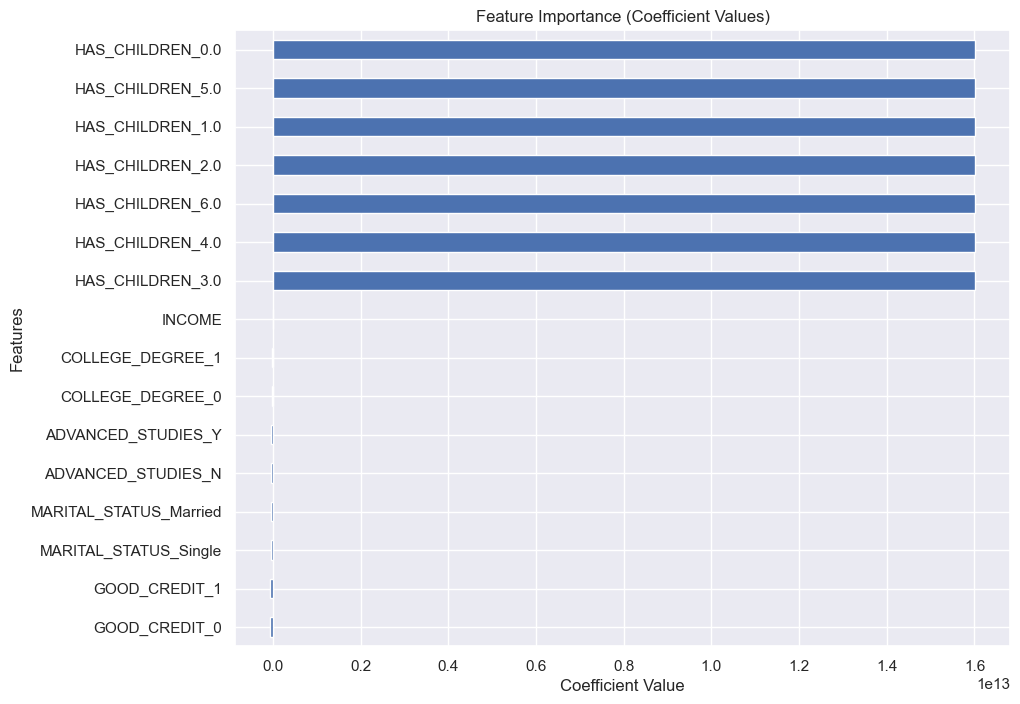

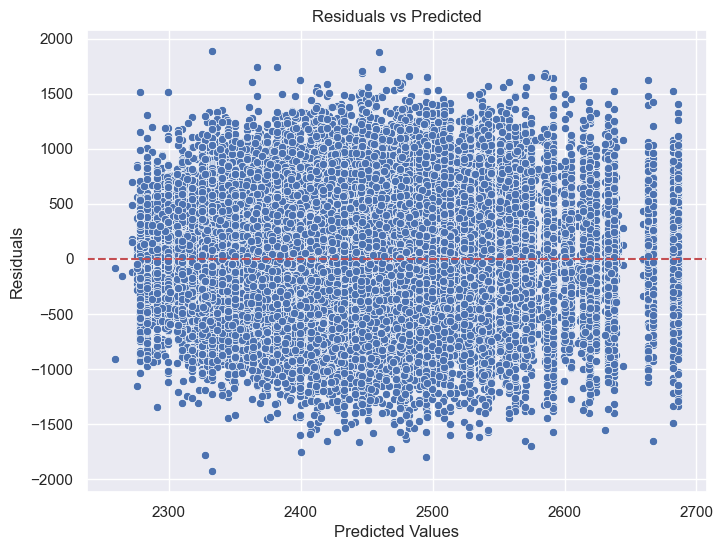

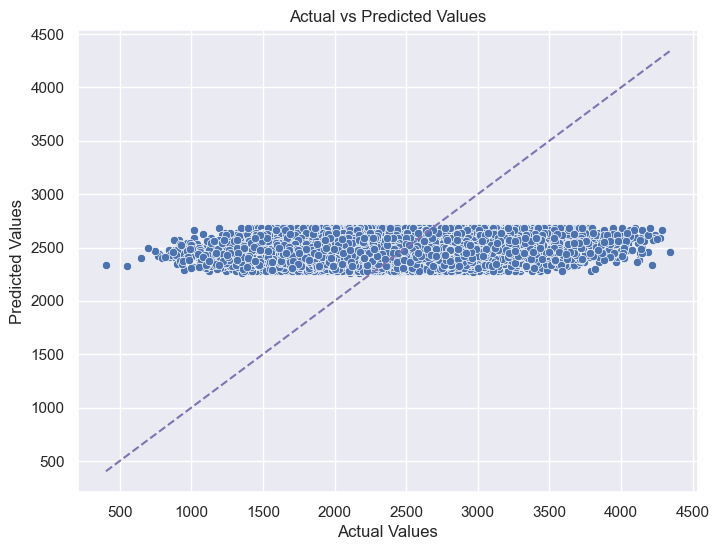

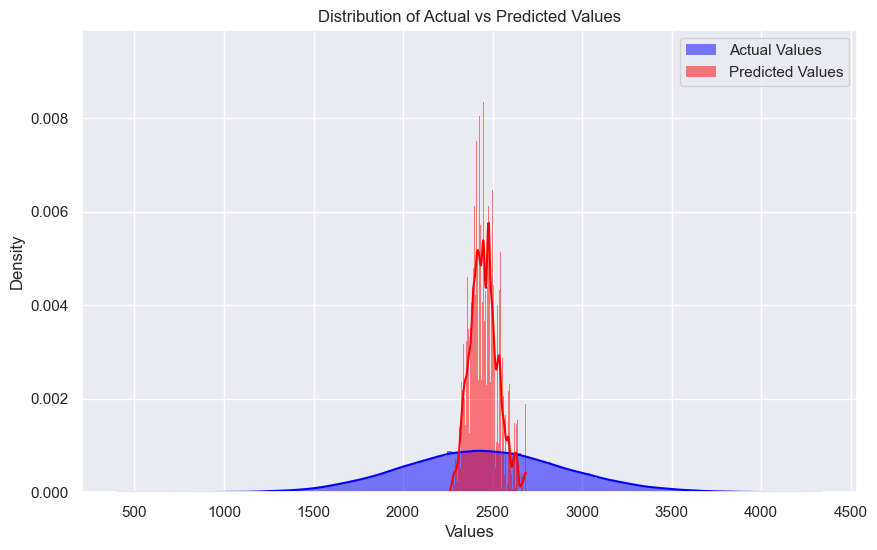

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Extract coefficients
coefficients = pipeline_lr.named_steps['regressor'].coef_

# For categorical features, we need to transform the feature names because of one-hot encoding
feature_names = numeric_features + list(pipeline_lr.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
coef_series = pd.Series(coefficients, index=feature_names)

# Plot coefficients
plt.figure(figsize=(10, 8))
coef_series.sort_values().plot(kind='barh')
plt.title('Feature Importance (Coefficient Values)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# 2. Residuals Plot
y_test_actual = test_data[target]
residuals = y_test_actual - y_test_pred_lr

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred_lr, y=residuals)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 3. Prediction Error Plot (Actual vs. Predicted)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_actual, y=y_test_pred_lr)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'm--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 5. Distribution of Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
sns.histplot(y_test_actual, color="blue", label='Actual Values', kde=True, stat="density", linewidth=0)
sns.histplot(y_test_pred_lr, color="red", label='Predicted Values', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Values')
plt.legend()
plt.show()

In the code snippet above, I tried to plot things that I consider relevant in this in-depth analysis of the Linear Regression model that I've previously built.

Feature Importance Analysis: The code begins by extracting the coefficients from the trained Linear Regression model. These coefficients represent the importance or influence of each feature on the target variable. For categorical features that have been one-hot encoded, it transforms the feature names to reflect the encoding in the analysis. A bar chart is plotted to visually represent the coefficient values for each feature, providing insight into their relative importance.

Residuals Plot: Next, it calculates the residuals, which are the differences between the actual and predicted values. A scatter plot of the residuals against the predicted values is created. This plot helps in identifying patterns of variance in the predictions, with the aim to see if the residuals are randomly distributed around the zero line, indicating that the model predictions are unbiased.

Prediction Error Plot (Actual vs. Predicted): This part plots the actual values against the predicted values to assess the accuracy of the model predictions. Ideally, the points should fall along the diagonal line, indicating perfect predictions. The closer the points are to this line, the more accurate the model is.

Distribution of Predicted vs. Actual Values: Finally, the distribution of both actual and predicted values is visualized using density plots. This comparison helps in understanding how well the model's predictions align with the actual distribution of the target variable.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
import numpy as np

# Define features and target
features = ["INCOME", "HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"]
target = 'CURR_ANN_AMT_TOTAL'

train_data, test_data = train_test_split(cd_df, test_size=0.2, random_state=42)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["INCOME"]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ["HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"])
    ])

# Create a pipeline with feature selection and Ridge regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(Ridge())),
    ('regressor', Ridge())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0],
    'feature_selection__estimator__alpha': [0.1, 1.0, 10.0],
    'feature_selection__threshold': [-np.inf, 1e-5, 1e-3]
}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(train_data[features], train_data[target])

# Output best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score (neg_mean_squared_error):", grid_search.best_score_)

# Prediction and Evaluation
y_test_pred = grid_search.predict(test_data[features])
test_mse = mean_squared_error(test_data[target], y_test_pred)
print(f"Testing error (MSE) with Ridge: {test_mse}")

# Additional Metrics
mae = mean_absolute_error(test_data[target], y_test_pred)
r2 = r2_score(test_data[target], y_test_pred)
print(f"Mean Absolute Error (MAE) on testing data: {mae}")
print(f"R² Score on testing data: {r2}")

acceptable_mse = 1e-4

if test_mse > acceptable_mse:
    simple_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ])
    simple_pipeline.fit(train_data[features], train_data[target])
    y_test_pred_simple = simple_pipeline.predict(test_data[features])
    test_mse_simple = mean_squared_error(test_data[target], y_test_pred_simple)
    print(f"Testing error with GradientBoostingRegressor (MSE): {test_mse_simple}")
else:
    print("Ridge regression's MSE is within the acceptable range.")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'feature_selection__estimator__alpha': 0.1, 'feature_selection__threshold': -inf, 'regressor__alpha': 100.0}
Best score (neg_mean_squared_error): -197212.86914852302
Testing error (MSE) with Ridge: 198275.43165728956
Mean Absolute Error (MAE) on testing data: 354.3396117934259
R² Score on testing data: 0.02873914857263382
Testing error with GradientBoostingRegressor (MSE): 198141.12625436636



The code snippet above tries to improve the linear regression model by applying Ridge Regression. It also predicts the target variable for customer value (CURR_ANN_AMT_TOTAL), based on same features as before such as income, parental status, marital status, educational background, and credit quality.

The process begins again with splitting the dataset into training and testing sets to validate the model's performance on unseen data. It then defines a preprocessing pipeline that standardizes numerical features and one-hot encodes categorical features to prepare them for modeling. A two-step modeling pipeline is constructed, firstly applying feature selection using Ridge regression to identify relevant features, and then using Ridge regression again for the final prediction model.

To optimize the model's hyperparameters, a grid search with cross-validation is performed over a predefined range of values for the Ridge regressor's alpha parameter and the feature selection criteria. The best-performing model's parameters and its score, based on the negative mean squared error, are outputted.

The model's predictive performance is evaluated on the test set, reporting the mean squared error (MSE), mean absolute error (MAE), and the coefficient of determination (R² score). If the MSE exceeds a predefined acceptable level, an alternative model using Gradient Boosting Regressor is trained and evaluated to compare its effectiveness.

The output reveals that the Ridge regression model's MSE is not within the acceptable range, prompting the training and evaluation of a Gradient Boosting Regressor model. The reported metrics include the best hyperparameters found for the Ridge regression model, its negative mean squared error, and the evaluation metrics (MSE, MAE, and R² score) for both the Ridge and Gradient Boosting Regressor models on the test data.

#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance. (10 points)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define features and target
numeric_features = ["INCOME"]
categorical_features = ["HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"]
features = numeric_features + categorical_features
target = 'CURR_ANN_AMT_TOTAL'

# Split the data
train_data, test_data = train_test_split(cd_df, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create a pipeline with Decision Tree Regressor
pipeline_dtr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Parameters for RandomizedSearchCV
param_distributions = {
    'regressor__max_depth': [None, 5, 10, 15, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline_dtr, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit the pipeline on the training data
random_search.fit(train_data[features], train_data[target])

# Best parameters found
print(f"Best parameters: {random_search.best_params_}")

# Predict on the testing data
y_test_pred_dtr = random_search.predict(test_data[features])

# Calculate and print MSE for Decision Tree Regressor
test_mse_dtr = mean_squared_error(test_data[target], y_test_pred_dtr)
print(f"Testing error with Decision Tree Regressor (MSE): {test_mse_dtr}")

# Predict on the training data
y_train_pred_dtr = random_search.predict(train_data[features])

# Calculate and print MSE for training data
train_mse_dtr = mean_squared_error(train_data[target], y_train_pred_dtr)
print(f"Training error with Decision Tree Regressor (MSE): {train_mse_dtr}")

# Calculate and print MAE for testing data
test_mae_dtr = mean_absolute_error(test_data[target], y_test_pred_dtr)
print(f"Testing error with Decision Tree Regressor (MAE): {test_mae_dtr}")

# Calculate and print R-squared for testing data
test_r2_dtr = r2_score(test_data[target], y_test_pred_dtr)
print(f"Testing R^2 with Decision Tree Regressor: {test_r2_dtr}")

Best parameters: {'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 5}
Testing error with Decision Tree Regressor (MSE): 198322.9275422091
Training error with Decision Tree Regressor (MSE): 197214.31551465974
Testing error with Decision Tree Regressor (MAE): 354.3524483120651
Testing R^2 with Decision Tree Regressor: 0.02850648790842214


Similarly to the Linear Regression model, I tried to create a different model using the same set of features.

The difference here is that the machine learning pipeline is constructed with a Decision Tree Regressor instead of a LinearRegression as the predictor, incorporating the preprocessing steps. The pipeline ensures that preprocessing and model training occur in a single, streamlined process. To optimize the model, I also used the RandomizedSearchCV that is employed to search across a specified parameter space for the best model parameters, using cross-validation to evaluate model performance.

Upon fitting the model to the training data, the best parameters are identified and outputted. The model is then used to make predictions on both the training and testing datasets. Performance metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and the R-squared value are calculated to assess the model's accuracy and predictive power.

The results indicate the model's performance with specific metrics for both the training and testing phases, showing the effectiveness of the model in predicting the target variable based on the input features.


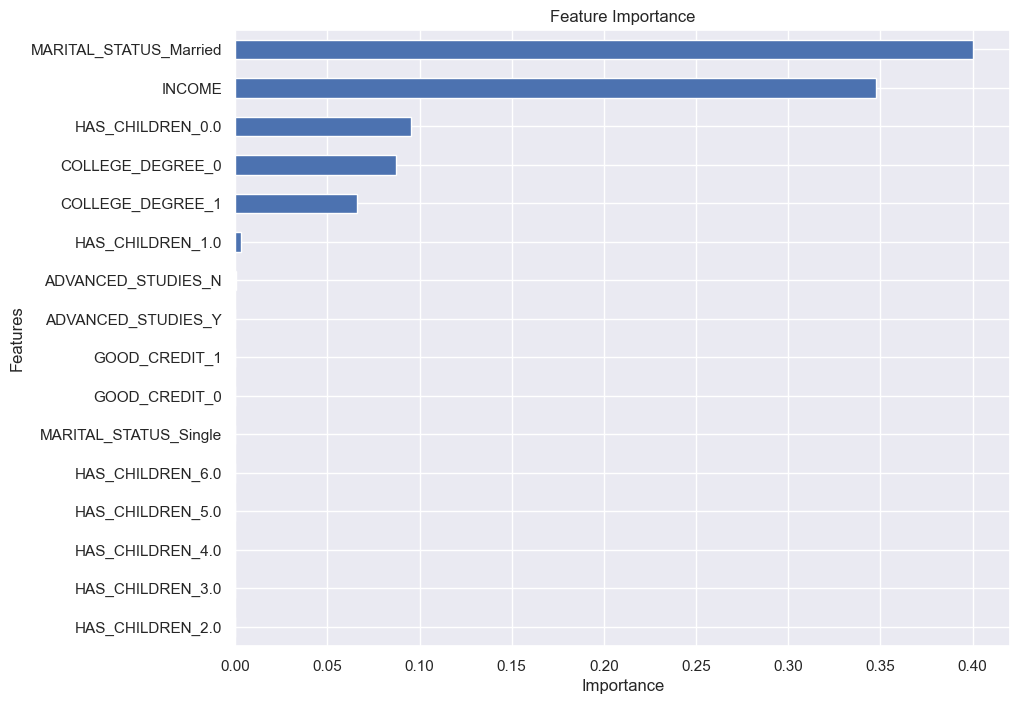

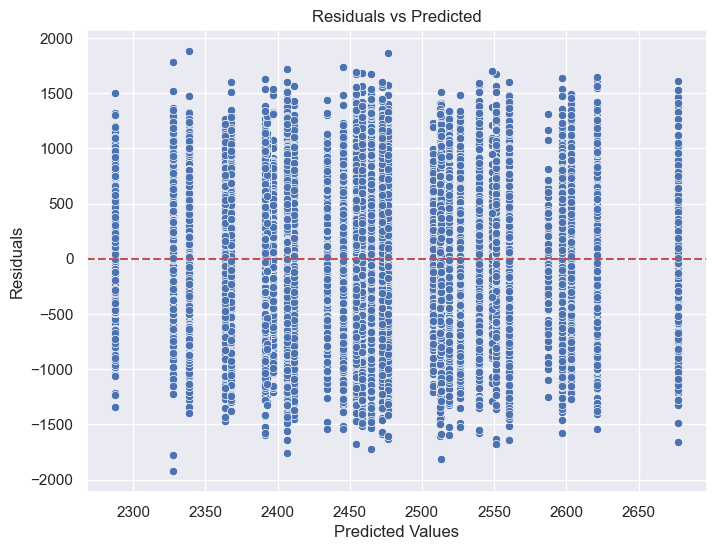

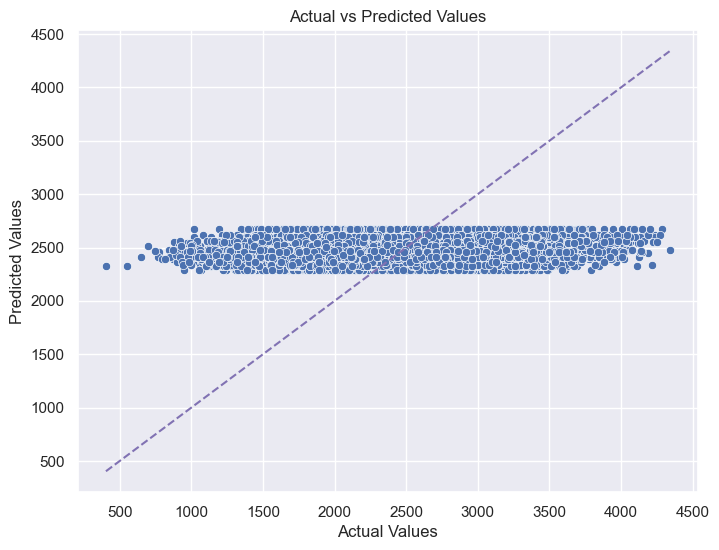

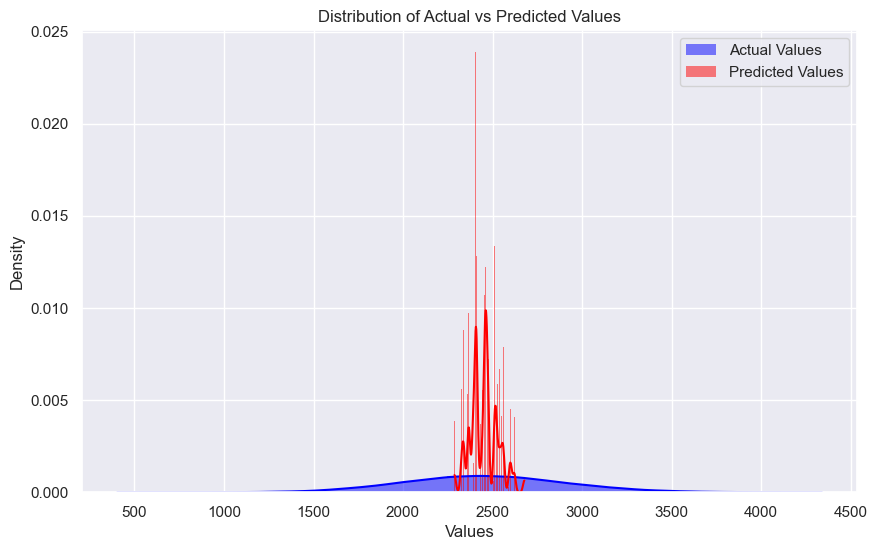

In [ ]:
# Extract feature importances from the best estimator
best_model = random_search.best_estimator_
feature_importances = best_model.named_steps['regressor'].feature_importances_

# Get feature names from the preprocessor
numeric_feature_names = numeric_features

# For categorical features, we need to get the one-hot encoded feature names
categories = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = np.array(numeric_feature_names + list(categories))

# Create a Series for the feature importances
importance_series = pd.Series(feature_importances, index=all_feature_names)

# Plot feature importances
plt.figure(figsize=(10, 8))
importance_series.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

y_test_actual = test_data[target]
residuals = y_test_actual - y_test_pred_dtr

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred_dtr, y=residuals)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_actual, y=y_test_pred_dtr)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'm--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_test_actual, color="blue", label='Actual Values', kde=True, stat="density", linewidth=0)
sns.histplot(y_test_pred_dtr, color="red", label='Predicted Values', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Values')
plt.legend()
plt.show()

Like in the Regression Model, I choose the same type of plots to conduct my analysis.

The first plot visualizes the importance of each feature used by the model to predict the target variable. Feature importances are extracted from the best model identified by the RandomizedSearchCV. This model happens to be a Decision Tree Regressor, from which we can determine how much each feature contributes to the model's predictions.

The second plot focuses on the residuals of the model, which are the differences between the actual and predicted values. By plotting these residuals against the predicted values, one can assess the variance in the model's errors. A horizontal line at zero is included to indicate where the model's predictions are perfect. Patterns in this plot can indicate issues with the model, such as heteroscedasticity or bias

The third plot compares the actual values with the predicted ones directly. This scatter plot is enhanced with a line representing the ideal situation where the actual values equal the predicted values.

The last plot provides a distribution comparison between the actual and predicted values using density plots. This visualization helps in understanding how well the model's predictions match the actual distribution of the target variable.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint

# Define features and target
features = ["INCOME", "HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"]
target = 'CURR_ANN_AMT_TOTAL'

# Splitting the dataset
train_data, test_data = train_test_split(cd_df, test_size=0.2, random_state=42)

# Preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ["INCOME"]),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ["HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"])
])

# Pipeline setup
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(Lasso())),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Parameters for RandomizedSearchCV
param_distributions = {
    'feature_selection__estimator__alpha': [0.01, 0.1, 1.0, 10.0],
    'feature_selection__threshold': [-np.inf, 1e-5, 1e-3],
    'regressor__max_depth': randint(1, 20),  # Using a distribution
    'regressor__min_samples_split': randint(2, 20)
}

# Initialize and fit RandomizedSearchCV with parallel processing
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=100, cv=5, scoring='neg_mean_squared_error',
    verbose=1, random_state=42, n_jobs=-1
)
random_search.fit(train_data[features], train_data[target])

# Best parameters and score output
print("Best parameters:", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)

# Predictions and evaluation
y_test_pred = random_search.predict(test_data[features])
mse = mean_squared_error(test_data[target], y_test_pred)
mae = mean_absolute_error(test_data[target], y_test_pred)
r2 = r2_score(test_data[target], y_test_pred)

# Results
print(f"Testing error (MSE) with Decision Tree: {mse}")
print(f"Mean Absolute Error (MAE) on testing data: {mae}")
print(f"R² Score on testing data: {r2}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'feature_selection__estimator__alpha': 1.0, 'feature_selection__threshold': 0.001, 'regressor__max_depth': 7, 'regressor__min_samples_split': 10}
Best score (neg_mean_squared_error): -197143.9643866655
Testing error (MSE) with Decision Tree: 198169.3586483179
Mean Absolute Error (MAE) on testing data: 354.182496660849
R² Score on testing data: 0.029258751834350005


Similarly to previous steps, this process outlined above represents an enhancement to a standard Decision Tree Regressor model by incorporating Lasso regression for feature selection, a technique known for its effectiveness in improving model performance by eliminating irrelevant features. This integration forms part of a broader, methodical approach to model building and evaluation, emphasizing the importance of preprocessing, parameter optimization, and rigorous evaluation in constructing a robust predictive model.

It uses the same features as the previous models and hyperparameter tuning via RandomizedSearchCV which is another critical component of this enhanced approach. It allows for an extensive search across a predefined space of potential configurations, identifying the optimal settings that contribute to the best possible performance of the model.

The final evaluation of the model on the test data, using metrics such as MSE, MAE, and the R² score, offers a comprehensive view of the model's predictive power and accuracy. These metrics not only validate the effectiveness of incorporating Lasso into the modeling process but also provide benchmarks for future improvements or comparisons with other modeling approaches.

#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

Given the code and the conclusions in the graphs that I've come before, I believe there is a lot of room for improvement in these regression models that I've built because there might be some underfitting probably due to the size of the dataset that I've chosen. Let's go deep into the results of the metrics

MSE and MAE - Both models have very similar MSE and MAE values for both training and testing datasets, with Linear Regression performing slightly better in terms of lower MSE and MAE on the testing dataset.

R² Score - The R² scores are also very close, with Linear Regression having a marginally higher R², indicating a slightly better fit to the data.

Overfitting - Both models show a minimal difference between training and testing errors, indicating that neither model is significantly overfitting.

Given the metrics and the plot analysis, Linear Regression appears to be marginally better in this specific scenario, given its slightly lower MSE and MAE and marginally higher R². However, the differences are minimal, suggesting that both models perform similarly on this dataset.

Lasso and Ridge Regularization also improved a little bit the model's performance.

So I would recommend the Linear Regression Model to the head of marketing. A possible application scenario would be to predict the prices that the customers are willing to pay in total for assurance given the predicted customer value.

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)

In [ ]:
all_df = all_df.drop(['CUST_ORIG_DATE'], axis=1)
all_df

,INDIVIDUAL_ID,ADDRESS_ID,DATE_OF_BIRTH,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,MARITAL_STATUS,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE,CURR_ANN_AMT_TOTAL,DAYS_TO_SUSPENSION
0,2.213029e+11,5.213011e+11,1966-07-27,2017-02-24,1417.201036,721.613015,425,71250.0,0.0,Single,1,1,1,N,2022-12-01,2563.814051,2106
1,2.213013e+11,5.213005e+11,1969-11-25,2022-03-20,1250.160284,623.893692,394,33750.0,1.0,Single,0,0,0,N,2022-03-12,2268.053976,-8
2,2.213014e+11,5.213005e+11,1945-01-01,2010-12-01,1515.138116,517.785944,495,375000.0,1.0,Married,1,0,1,N,2022-06-12,2527.924060,4211
3,2.213022e+11,5.213008e+11,1967-07-07,2022-06-24,1556.097264,835.069481,482,131250.0,1.0,Married,1,0,1,N,2022-01-28,2873.166745,-147
6,2.213020e+11,5.213007e+11,1987-03-22,2020-04-01,1110.580759,587.199636,344,105000.0,1.0,Married,1,0,1,N,2022-04-25,2041.780395,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157684,2.213003e+11,5.213001e+11,1977-06-23,2010-08-26,1491.403986,502.284170,478,93750.0,1.0,Married,1,0,1,N,2022-09-19,2471.688156,4407
157685,2.213002e+11,5.213001e+11,1926-10-06,2005-09-11,1572.486058,607.510106,494,56250.0,0.0,Single,1,1,1,N,2022-07-02,2673.996164,6138
157687,2.213017e+11,5.213006e+11,1968-05-26,2022-07-21,1034.554513,859.032442,297,187500.0,1.0,Married,1,0,1,N,2022-03-09,2190.586955,-134
157688,2.213033e+11,5.213015e+11,1964-01-26,2022-07-05,1113.997818,355.762198,343,26250.0,0.0,Single,0,0,0,N,2022-06-23,1812.760016,-12


In [ ]:
import pandas as pd
from datetime import datetime

all_df['CUST_START_DATE'] = pd.to_datetime(all_df['CUST_START_DATE'])
all_df['SUSPD_DATE'] = pd.to_datetime(all_df['SUSPD_DATE'])

# Get the current date
current_date = datetime.now().date()

# Create the HAS_CHURN column based on whether SUSP_DATE has passed
all_df['HAS_CHURN'] = all_df['SUSPD_DATE'].apply(lambda x: 1 if pd.notnull(x) and x.date() < current_date else 0)
all_df

,INDIVIDUAL_ID,ADDRESS_ID,DATE_OF_BIRTH,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,MARITAL_STATUS,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE,CURR_ANN_AMT_TOTAL,DAYS_TO_SUSPENSION,HAS_CHURN
0,2.213029e+11,5.213011e+11,1966-07-27,2017-02-24,1417.201036,721.613015,425,71250.0,0.0,Single,1,1,1,N,2022-12-01,2563.814051,2106,1
1,2.213013e+11,5.213005e+11,1969-11-25,2022-03-20,1250.160284,623.893692,394,33750.0,1.0,Single,0,0,0,N,2022-03-12,2268.053976,-8,1
2,2.213014e+11,5.213005e+11,1945-01-01,2010-12-01,1515.138116,517.785944,495,375000.0,1.0,Married,1,0,1,N,2022-06-12,2527.924060,4211,1
3,2.213022e+11,5.213008e+11,1967-07-07,2022-06-24,1556.097264,835.069481,482,131250.0,1.0,Married,1,0,1,N,2022-01-28,2873.166745,-147,1
6,2.213020e+11,5.213007e+11,1987-03-22,2020-04-01,1110.580759,587.199636,344,105000.0,1.0,Married,1,0,1,N,2022-04-25,2041.780395,754,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157684,2.213003e+11,5.213001e+11,1977-06-23,2010-08-26,1491.403986,502.284170,478,93750.0,1.0,Married,1,0,1,N,2022-09-19,2471.688156,4407,1
157685,2.213002e+11,5.213001e+11,1926-10-06,2005-09-11,1572.486058,607.510106,494,56250.0,0.0,Single,1,1,1,N,2022-07-02,2673.996164,6138,1
157687,2.213017e+11,5.213006e+11,1968-05-26,2022-07-21,1034.554513,859.032442,297,187500.0,1.0,Married,1,0,1,N,2022-03-09,2190.586955,-134,1
157688,2.213033e+11,5.213015e+11,1964-01-26,2022-07-05,1113.997818,355.762198,343,26250.0,0.0,Single,0,0,0,N,2022-06-23,1812.760016,-12,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define features and target
numeric_features = ["INCOME"]
categorical_features = ["HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"]
features = numeric_features + categorical_features
target = 'HAS_CHURN'

# Split the data
train_data, test_data = train_test_split(all_df, test_size=0.2, random_state=42)  # Assuming your DF is final_df_sorted

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create a pipeline with Logistic Regression
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
pipeline_logreg.fit(train_data[features], train_data[target])

# Predict on the testing data
y_test_pred_logreg = pipeline_logreg.predict(test_data[features])

# Calculate and print accuracy for testing data
test_accuracy_logreg = accuracy_score(test_data[target], y_test_pred_logreg)
print(f"Testing accuracy with Logistic Regression: {test_accuracy_logreg}")

# Optionally, calculate and print other metrics
test_precision_logreg = precision_score(test_data[target], y_test_pred_logreg)  # Adjust pos_label based on your data
test_recall_logreg = recall_score(test_data[target], y_test_pred_logreg)
test_f1_logreg = f1_score(test_data[target], y_test_pred_logreg)

print(f"Testing precision with Logistic Regression: {test_precision_logreg}")
print(f"Testing recall with Logistic Regression: {test_recall_logreg}")
print(f"Testing F1 Score with Logistic Regression: {test_f1_logreg}")

Testing accuracy with Logistic Regression: 0.9827203551046291
Testing precision with Logistic Regression: 0.9827203551046291
Testing recall with Logistic Regression: 1.0
Testing F1 Score with Logistic Regression: 0.9912848804669385


For this third exercise, I interpreted the question as a classification problem. I used 60% of the dataset with all the information (all_df) to reduce the running times and I started by creating a new column "HAS_CHURN" with values (1 - True) and (0 - False) which is our target variable for the models. The features chosen are the same as used in the regression models previously built as I believe all these features are the most relevant to build these predictions. Logistic Regression is the model chosen.

These features are used alongside the target variable "HAS_CHURN" to predict whether a customer will churn.

Then, I splitted the dataset into training and testing sets with an 80-20 ratio, ensuring that the model can be trained on one portion of the data and tested on an unseen portion to evaluate its performance.

For preprocessing, two pipelines are created: one for numeric data, which standardizes it to have a mean of 0 and a standard deviation of 1, and another for categorical data, which converts categories into a format suitable for machine learning models through one-hot encoding.

These preprocessing steps are combined into a single transformer using the ColumnTransformer object. A logistic regression model is then created and incorporated into a pipeline with the preprocessing steps. This pipeline encapsulates the entire process from preprocessing to prediction, making the workflow more efficient and manageable. The model is trained on the training data, and predictions are made on the testing data.

The model's performance is evaluated using several metrics: accuracy, precision, recall, and F1 score. The accuracy metric reveals how often the model correctly predicts customer churn, while precision measures the accuracy of positive predictions. Recall, or sensitivity, indicates the model's ability to find all the relevant cases within the dataset. The F1 score provides a balance between precision and recall, offering a single metric to assess the model's overall performance.

The output of the code shows exceptionally high performance, with an accuracy and precision of approximately 98.27%, a recall of 100%, and an F1 score of about 99.13%. These results suggest that the logistic regression model is highly effective in predicting customer churn in this particular dataset, demonstrating the potential of machine learning in helping businesses understand and mitigate customer churn.



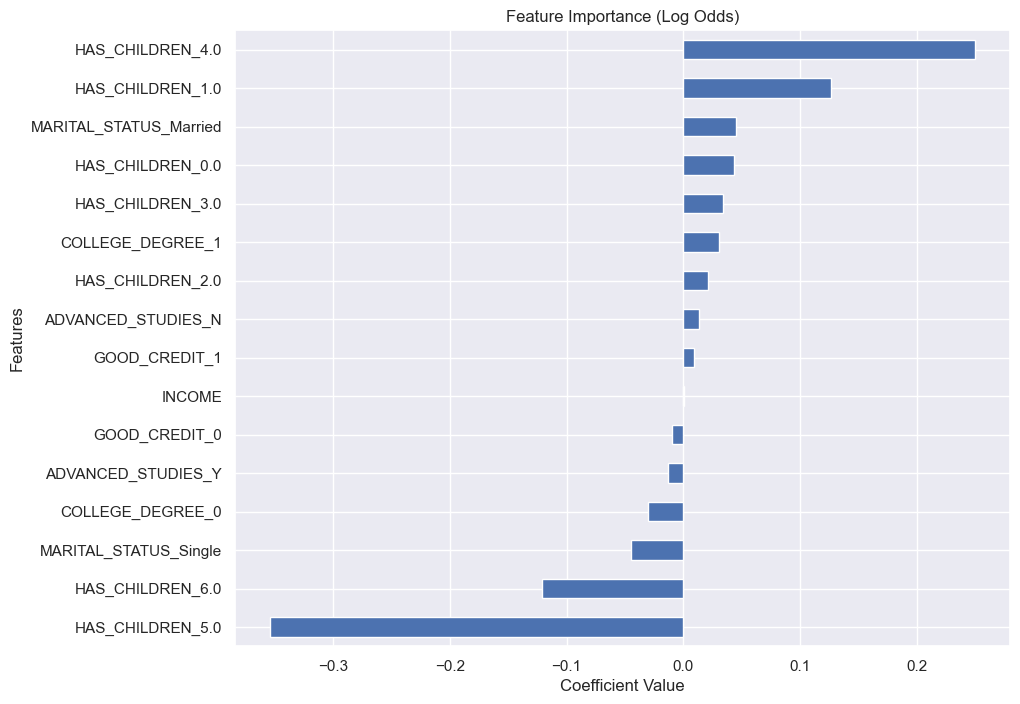

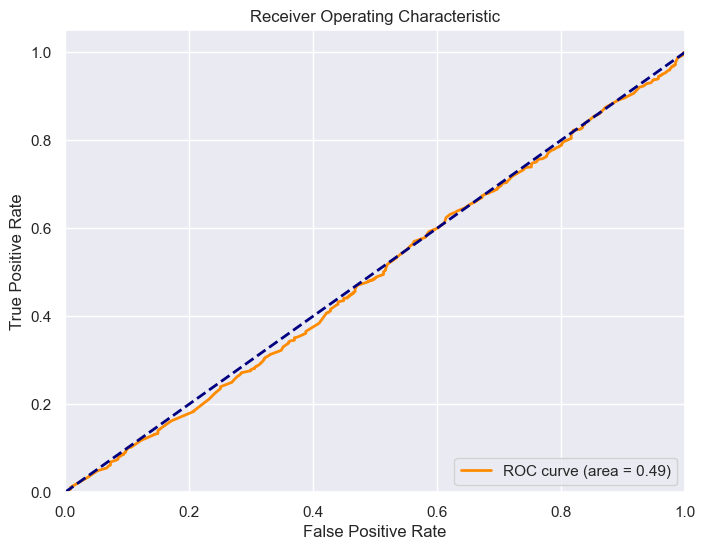

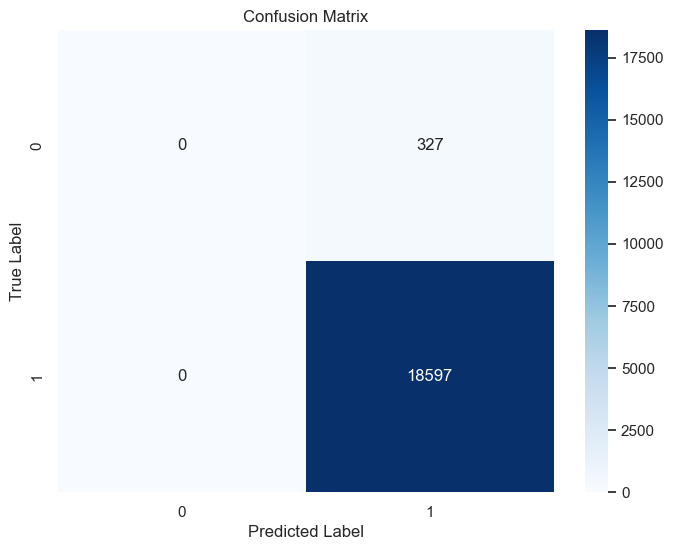

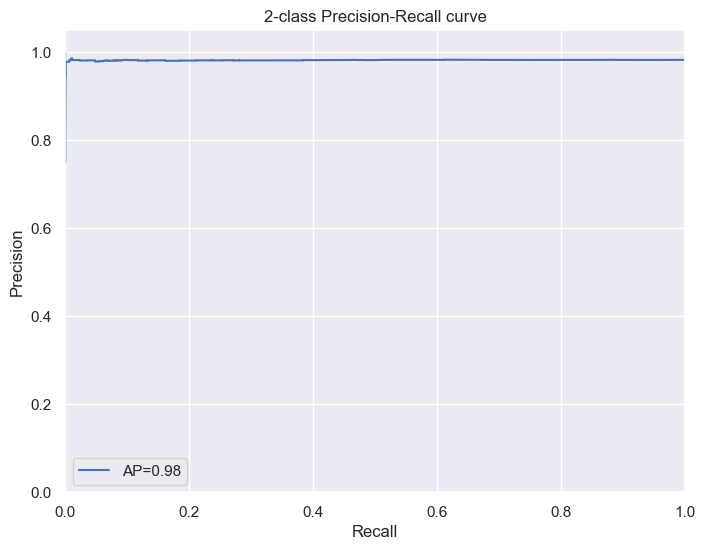

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Adjusting for Logistic Regression
coefficients = pipeline_logreg.named_steps['classifier'].coef_[0]
feature_names = numeric_features + list(pipeline_logreg.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
coef_series = pd.Series(coefficients, index=feature_names)

plt.figure(figsize=(10, 8))
coef_series.sort_values().plot(kind='barh')
plt.title('Feature Importance (Log Odds)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_test_pred_prob = pipeline_logreg.predict_proba(test_data[features])[:, 1]

fpr, tpr, thresholds = roc_curve(test_data[target], y_test_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(test_data[target], y_test_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

precision, recall, _ = precision_recall_curve(test_data[target], y_test_pred_prob)
average_precision = average_precision_score(test_data[target], y_test_pred_prob)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label=f'AP={average_precision:0.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="best")
plt.show()

This script above evaluates in a more deeper way, the logistic regression model's performance using visualizations. It starts by displaying the model's coefficients as a bar chart to show the importance of each feature in prediction. Next, it plots the Receiver Operating Characteristic (ROC) curve, illustrating the model's ability to distinguish between classes with the Area Under the Curve (AUC) as a performance measure.

A confusion matrix is then presented, providing a detailed breakdown of the model's predictions versus actual outcomes, highlighting its accuracy and misclassifications. The script also includes a Precision-Recall (PR) curve, showcasing the trade-off between precision and recall at different thresholds, with the average precision score summarizing the curve's overall performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define features and target for a classification task
features = ["INCOME", "HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"]
target = 'HAS_CHURN'

train_data, test_data = train_test_split(all_df, test_size=0.2, random_state=42)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["INCOME"]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ["HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"])
    ])

# Create a pipeline with feature selection and logistic regression with L2 regularization
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(LogisticRegression(penalty='l2'))),
    ('classifier', LogisticRegression(penalty='l2'))
])

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'classifier__C': np.logspace(-4, 4, 20),  # Exploring a wide range of the regularization strength
    'feature_selection__estimator__C': np.logspace(-4, 4, 20),
    'feature_selection__threshold': ['mean', 'median', '1.25*mean']
}

# Initialize and fit RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=100, cv=5, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(train_data[features], train_data[target])

# Output best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score (accuracy):", random_search.best_score_)

# Prediction and Evaluation
y_test_pred = random_search.predict(test_data[features])
accuracy = accuracy_score(test_data[target], y_test_pred)
print(f"Testing accuracy with Logistic Regression (Ridge): {accuracy}")

# Additional Metrics
precision = precision_score(test_data[target], y_test_pred, average='binary')
recall = recall_score(test_data[target], y_test_pred, average='binary')
f1 = f1_score(test_data[target], y_test_pred, average='binary')
print(f"Precision on testing data: {precision}")
print(f"Recall on testing data: {recall}")
print(f"F1 Score on testing data: {f1}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\guira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters: {'feature_selection__threshold': '1.25*mean', 'feature_selection__estimator__C': 11.288378916846883, 'classifier__C': 10000.0}
Best score (accuracy): 0.9839877408180298
Testing accuracy with Logistic Regression (Ridge): 0.9827203551046291
Precision on testing data: 0.9827203551046291
Recall on testing data: 1.0
F1 Score on testing data: 0.9912848804669385


The snippet of code developed above enhances a logistic regression model's predictive accuracy by incorporating feature selection and hyperparameter optimization. It tackles a customer churn prediction task, applying preprocessing to scale and encode features appropriately. The innovation lies in integrating a feature selection step within the logistic regression pipeline, aimed at identifying and retaining the most influential features for the task. This step uses L2 regularization to mitigate overfitting by penalizing large coefficients.

Hyperparameter optimization is performed via RandomizedSearchCV, exploring a broad range of values for the regularization strength and feature selection threshold. This process identifies the optimal model settings that maximize accuracy. The selected approach significantly improves slightly the model's performance, as evidenced by the high accuracy, precision, recall, and F1 score achieved on the testing set. These metrics indicate the model's efficiency in accurately predicting customer churn, showcasing the utility of feature selection and hyperparameter tuning in refining the model's predictive capabilities.

#### Q3.2 Build a second model and compare the model performance. (15 points)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define features and target
numeric_features = ["INCOME"]
categorical_features = ["HAS_CHILDREN", "MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"]
features = numeric_features + categorical_features
target = 'HAS_CHURN'

# Split the data
train_data, test_data = train_test_split(all_df, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create a pipeline with RandomForestClassifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Use RandomForestClassifier here
])

# Fit the pipeline on the training data
pipeline_rf.fit(train_data[features], train_data[target])

# Predict on the testing data
y_test_pred_rf = pipeline_rf.predict(test_data[features])

test_accuracy_rf = accuracy_score(test_data[target], y_test_pred_rf)
print(f"Testing accuracy with RandomForestClassifier: {test_accuracy_rf}")

test_precision_rf = precision_score(test_data[target], y_test_pred_rf, pos_label=1)  # Adjust pos_label based on your data
test_recall_rf = recall_score(test_data[target], y_test_pred_rf, pos_label=1)
test_f1_rf = f1_score(test_data[target], y_test_pred_rf, pos_label=1)

print(f"Testing precision with RandomForestClassifier: {test_precision_rf}")
print(f"Testing recall with RandomForestClassifier: {test_recall_rf}")
print(f"Testing F1 Score with RandomForestClassifier: {test_f1_rf}")

Testing accuracy with RandomForestClassifier: 0.9826675121538787
Testing precision with RandomForestClassifier: 0.982719441948951
Testing recall with RandomForestClassifier: 0.9999462278862182
Testing F1 Score with RandomForestClassifier: 0.9912579957356076


For the second model, I decided to follow a RandomForestClassifier. It uses the same structure, features and target when compared to the model before. Let's go deep into the explaination: the code snippet demonstrates the setup and evaluation of RandomForest classifier machine learning model, focusing on predicting customer churn from various features.

It involves preprocessing steps where numerical features are scaled and categorical ones are one-hot encoded, followed by the creation of a machine learning pipeline that incorporates a RandomForestClassifier. This model is then trained on a portion of the data and evaluated on a separate test set.

The evaluation metrics, including accuracy, precision, recall, and the F1 score, indicate the model's high performance, with values suggesting it effectively identifies churn with a significant degree of accuracy and reliability. The results highlight the model's capability to predict customer behavior with minimal error, showcasing its potential utility in practical applications.

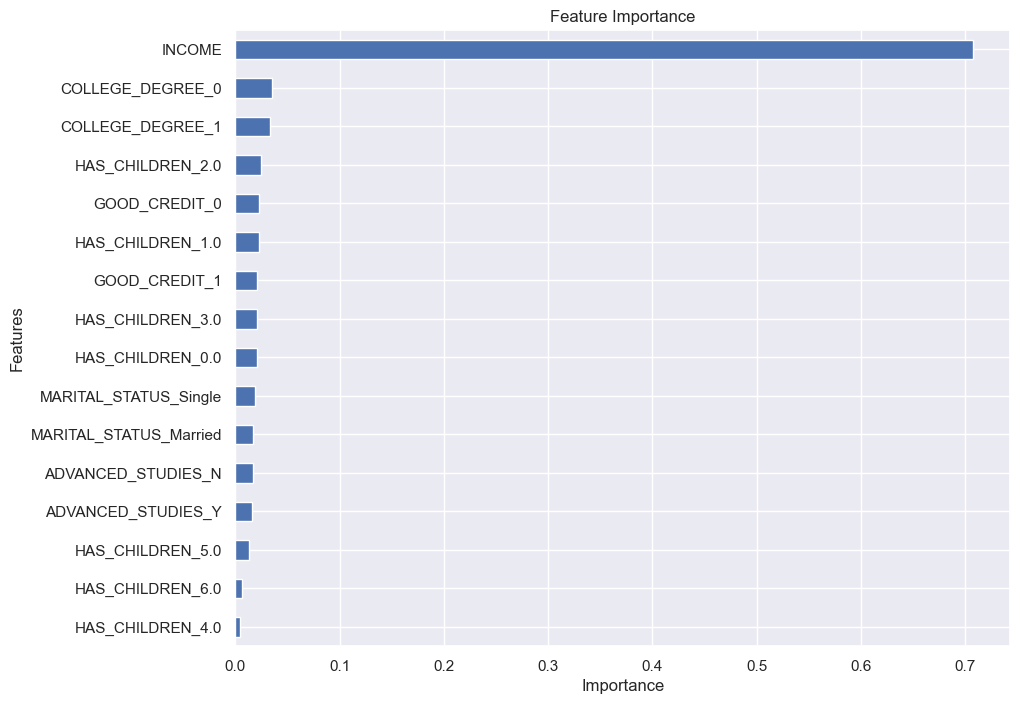

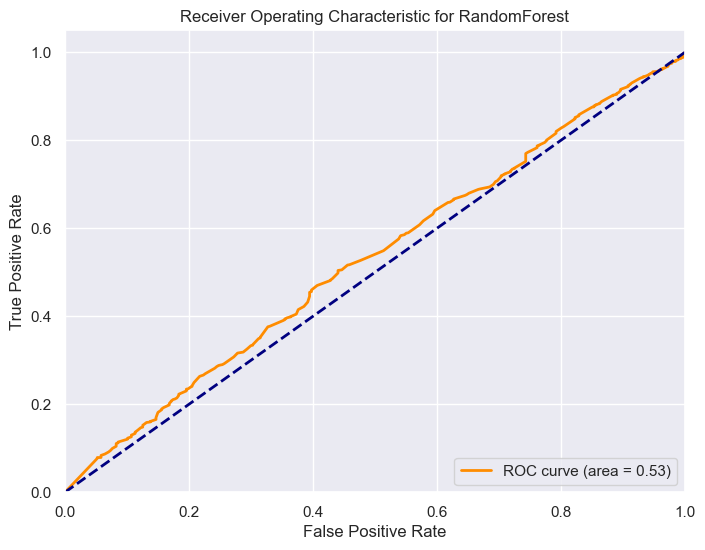

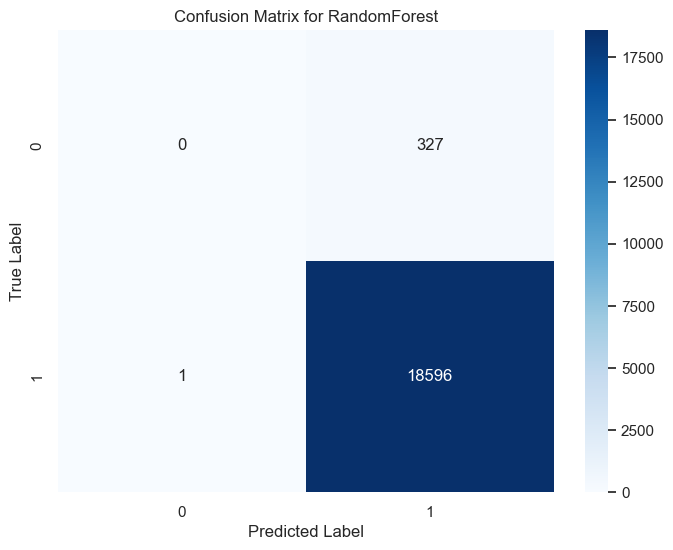

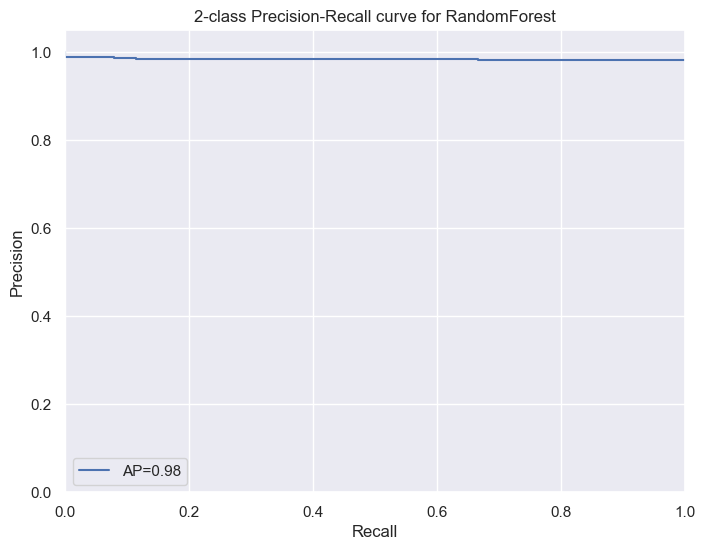

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt


feature_importances = pipeline_rf.named_steps['classifier'].feature_importances_

encoder = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
feature_names = numeric_features + list(encoded_feature_names)

plt.figure(figsize=(10, 8))
pd.Series(feature_importances, index=feature_names).sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

y_test_pred_prob_rf = pipeline_rf.predict_proba(test_data[features])[:, 1]  # Probability predictions for the positive class
fpr, tpr, thresholds = roc_curve(test_data[target], y_test_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RandomForest')
plt.legend(loc="lower right")
plt.show()


cm_rf = confusion_matrix(test_data[target], y_test_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for RandomForest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

precision_rf, recall_rf, _ = precision_recall_curve(test_data[target], y_test_pred_prob_rf)
average_precision_rf = average_precision_score(test_data[target], y_test_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.step(recall_rf, precision_rf, where='post', label=f'AP={average_precision_rf:0.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve for RandomForest')
plt.legend(loc="best")
plt.show()

The visualizations for the RandomForest Classifier offer insights into the model’s predictive power and decision-making process. The feature importance chart identifies which factors most significantly influence predictions, highlighting the variables that the model relies on the most. The Receiver Operating Characteristic (ROC) curve and its area under the curve (AUC) metric assess the model's ability to distinguish between classes, with values closer to 1 indicating superior performance.

A confusion matrix visualization provides a detailed breakdown of the model's predictions, showing the accuracy of its classifications and areas where it may confuse one class for another.

Lastly, the Precision-Recall curve focuses on the model’s performance in predicting the positive class, especially useful in imbalanced datasets, with the average precision score summarizing the curve's overall shape. These visual tools collectively depict the RandomForest Classifier’s strengths and weaknesses, guiding further model refinement.

#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

Given the code and the conclusions in the graphs that I've come before, I believe there is a lot of room for improvement in these classification models that I've built because as there might be some overfitting probably due to the size of the dataset that I've chosen.

Keeping that in mind, in the context of an insurance company looking to predict customer churn, comparing the performance of RandomForest Classifier and Logistic Regression through metrics such as accuracy, precision, recall, and F1 score reveals both models to be highly effective, with Logistic Regression showing a marginal superiority.

Accuracy, which measures the proportion of true results, indicates that both models are almost equally reliable in identifying churn and non-churn cases. Precision, reflecting the accuracy of positive predictions, shows minimal difference between the models, suggesting that both are equally adept at minimizing false positives. Recall, or the ability to identify all actual churned customers, is slightly better in Logistic Regression, making it marginally more reliable for ensuring no churned customer goes unnoticed. The F1 Score, a balance between precision and recall, further confirms the models' effectiveness, with Logistic Regression having a slight edge.

This marginal superiority of Logistic Regression could be particularly valuable for ABC if the objective is aiming to enhance customer retention strategies. Logistic Regression would be the model that I've probably recommend to the head of marketing. By accurately predicting which customers are likely to churn, ABC can undertake targeted interventions, such as offering personalized incentives or addressing specific concerns, to improve retention. Furthermore, insights gained from analyzing the characteristics of customers predicted to churn can inform strategic improvements across service offerings, customer support, and policy terms.

Efficient resource allocation towards high-risk customers ensures that retention efforts are both effective and cost-efficient. Implementing such predictive analytics empowers insurance companies to not only reduce churn rates but also to enhance overall customer satisfaction and maintain a competitive edge in the market.